In [7]:
import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

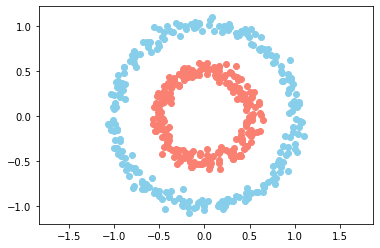

In [147]:
# Crear dataset
# Para la ayuda make_circles?

# Nº de registros de datos
n=500
# caracteristicas de los registros de nuestros datos
p=2

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1],c="salmon")
plt.axis("equal")
plt.show()

In [148]:
# Creamos una clase para 
# La red neuronal son posibles de vectorizar
# Dentro de una misma capa puedo vectorizarlas
# Cada capa es un módulo
# => Clase para que se refiera a una capa

# Clase de la capa de la red
class neural_layer():
    # Nº de conexiones => n_conn
    # Nº de neuronas => n_neur
    # Funcion de activacion para las neuronas => act_f
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1,n_neur)*2-1
        self.W = np.random.rand(n_conn,n_neur)*2-1
        

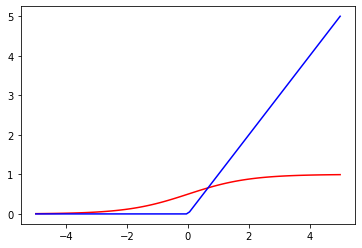

In [149]:
# Funcion de activacion
# Son la funcion por la cual se pasa la suma ponderada que se realiza en la neurona 
# y se introduce en la RN no linealidades que permite combinar muchas neuronas.
#

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1-x))

relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5,5, 100)
plt.plot(_x, sigm[0](_x), c="red")
plt.plot(_x, relu(_x),c="blue")

In [150]:
l0 = neural_layer(p,4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f):
    nn=[]
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn 


In [143]:
topology = [p,4,8,1]

neural_net = create_nn(topology, sigm)

# Funcion de coste
# error cuadrático medio: Yp:, Yr: np.mean((Yp-Yr)**2)
l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
           lambda Yp, Yr: (Yp - Yr))
# Entrenamiento de la red neuronal
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    out = [(None, X)]
    # Forward pass
    # Vector de entrada pasarlo capa por capa
    # Suma ponderada: Le sumamos el valor de entrada X *W , le sumamos el valor de vallas y luego la suma pasa a la funcion de activacion
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z,a))
        
    # print(l2_cost[0](out[-1][1],Y))
    if train:
        # Backward pass
        # Calcular derivadas parciales
        deltas = []
        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            # print(a.shape)
            
            if l == len(neural_net)-1:
                # Calcular delta última capa
                deltas.insert(0,l2_cost[1](a,Y)*neural_net[l].act_f[1](a))
            else:
                # print(deltas[0].shape, _W.shape)
                deltas.insert(0,deltas[0] @ _W.T * neural_net[l].act_f[1](a))
            _W = neural_net[l].W
            # Calcular delta respecto a capa previa
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            # print(out[l][1].T.shape, deltas[0],shape)
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0]* lr
    return out[-1][1]

train(neural_net,X,Y,l2_cost,0.5)

array([[0.61782143],
       [0.61042869],
       [0.61349748],
       [0.61291599],
       [0.61036   ],
       [0.61247353],
       [0.6128856 ],
       [0.61174714],
       [0.61324373],
       [0.61338291],
       [0.61349061],
       [0.61546469],
       [0.60841928],
       [0.61219206],
       [0.62282887],
       [0.61238706],
       [0.6130001 ],
       [0.61601409],
       [0.61801364],
       [0.61050565],
       [0.61214053],
       [0.62032679],
       [0.61368599],
       [0.61458576],
       [0.6230572 ],
       [0.61061234],
       [0.61400602],
       [0.61716082],
       [0.6202053 ],
       [0.6176945 ],
       [0.61769752],
       [0.60904408],
       [0.61975268],
       [0.61298493],
       [0.6184225 ],
       [0.61928706],
       [0.6182598 ],
       [0.61773762],
       [0.61937066],
       [0.62262905],
       [0.62162686],
       [0.61458859],
       [0.61825978],
       [0.61931467],
       [0.61936989],
       [0.62285567],
       [0.61604948],
       [0.615

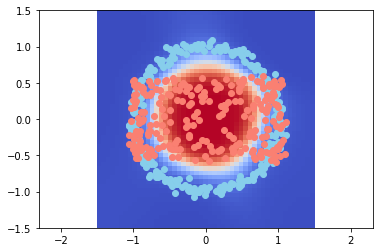

In [ ]:
import time 
from IPython.display import clear_output
neural_n = create_nn(topology, sigm)

loss = []

for i in range (2500):
    # Entrenamos la red.
    pY = train(neural_n, X, Y, l2_cost, lr=0.02)
    if i % 25 == 0:
        print(pY)
        # Cada 25 iteraciones calculamos el coste
        loss.append(l2_cost[0](pY, Y))
        res = 50 
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res,res))
        
        for i0,x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                # Hacemos una prediccion de la red
                _Y[i0,i1] = train(neural_n, np.array([[x0,x1]]), Y, l2_cost, train=False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1], c="skyblue")
        plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==1,1], c="salmon")
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.6)
        

In [ ]:
print()